# Import Required Libraries
Import the necessary libraries, including pandas, matplotlib, and seaborn.

In [108]:
# Import Required Libraries

import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

import os
from PIL import Image, ImageEnhance, ImageOps, ImageFilter
import random
import numpy as np
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset


# Load Data from .txt File
Read the data from the .txt file into a pandas DataFrame.

In [73]:
# Load Data from .txt File

# Read the data from the .txt file into a pandas DataFrame
file_path = 'Labels.txt'  # Replace with your actual file path
data = pd.read_csv(file_path, names=['Sample', 'output']) 
data['output'] = data['output'].str.strip()

# Display the first few rows of the DataFrame to verify the data is loaded correctly
data.head()

,Sample,output
0,sample_00000,5
1,sample_00001,5
2,sample_00002,8
3,sample_00003,5
4,sample_00004,9


# Visualize Data Distribution
Use matplotlib and seaborn to create visualizations of the data distribution.

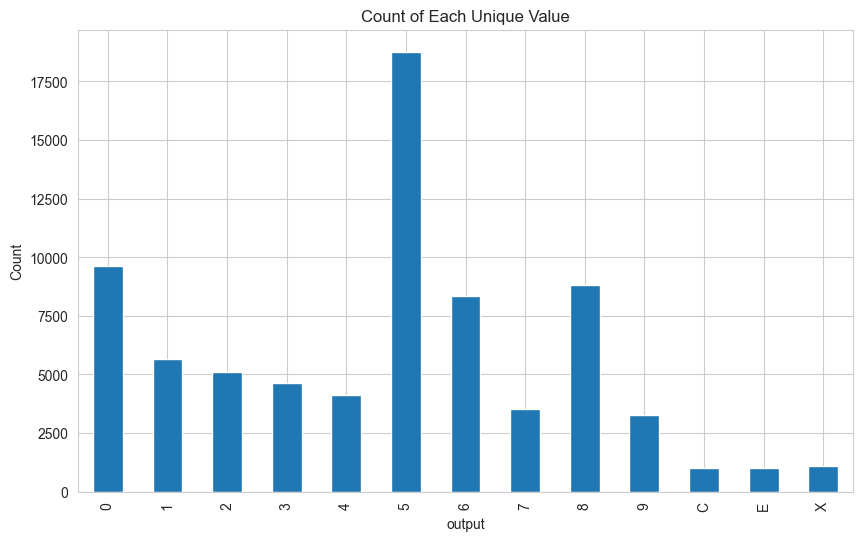

In [74]:
# Group by 'output' and count occurrences
output_counts = data.groupby('output').size()

# Plot the count of each unique value
plt.figure(figsize=(10, 6))
output_counts.sort_index().plot(kind='bar')
plt.xlabel('output')
plt.ylabel('Count')
plt.title('Count of Each Unique Value')
plt.show()

In [75]:
data["output"].unique()


array(['5', '8', '9', '1', '0', '7', '2', 'X', '3', '6', 'C', '4', 'E'],
      dtype=object)

In [76]:


# Display the first few rows of the DataFrame to verify the data is loaded correctly
print(data.head())

# Create lists for samples with specific output values
samples_C = data[data['output'] == 'C']['Sample'].tolist()
samples_E = data[data['output'] == 'E']['Sample'].tolist()
samples_X = data[data['output'] == 'X']['Sample'].tolist()

# Print the lists
print("Samples with output == 'C':", samples_C)
print("Samples with output == 'E':", samples_E)
print("Samples with output == 'X':", samples_X)

         Sample output
0  sample_00000      5
1  sample_00001      5
2  sample_00002      8
3  sample_00003      5
4  sample_00004      9
Samples with output == 'C': ['sample_00032', 'sample_00141', 'sample_00317', 'sample_00350', 'sample_00472', 'sample_00482', 'sample_00493', 'sample_00538', 'sample_00560', 'sample_00570', 'sample_00735', 'sample_00768', 'sample_00846', 'sample_00933', 'sample_00934', 'sample_01011', 'sample_01088', 'sample_01208', 'sample_01363', 'sample_01417', 'sample_01429', 'sample_01473', 'sample_01528', 'sample_01627', 'sample_01648', 'sample_01824', 'sample_01913', 'sample_01956', 'sample_01968', 'sample_02045', 'sample_02110', 'sample_02122', 'sample_02132', 'sample_02297', 'sample_02319', 'sample_02407', 'sample_02485', 'sample_02539', 'sample_02726', 'sample_02881', 'sample_02924', 'sample_02947', 'sample_03023', 'sample_03068', 'sample_03167', 'sample_03244', 'sample_03343', 'sample_03420', 'sample_03441', 'sample_03617', 'sample_03628', 'sample_03695', '

## Data augmentation of C, E and x

In [ ]:

# Define the directory containing the images
image_dir = 'Character_Images'  # Replace with your actual directory path

# Define the directories to save the augmented images
output_dirs = {
    'C': 'C',
    'E': 'E',
    'X': 'X',
    '0': '0',
    '1': '1',
    '2': '2',
    '3': '3',
    '4': '4',
    '6': '6',
    '7': '7',
    '8': '8',
    '9': '9'
}

# Create output directories if they don't exist
for dir_name in output_dirs.values():
    os.makedirs(dir_name, exist_ok=True)

# Function to perform data augmentation on an image
def augment_image(image):
    # Randomly apply transformations
    
    if random.choice([True, False]):
        degrees = random.randint(1, 10)
        image = image.rotate(degrees)
    if random.choice([True, False]):
        enhancer = ImageEnhance.Brightness(image)
        image = enhancer.enhance(random.uniform(0.5, 1.5))
    if random.choice([True, False]):
        enhancer = ImageEnhance.Contrast(image)
        image = enhancer.enhance(random.uniform(0.8, 1.3))
    if random.choice([True, False]):
        enhancer = ImageEnhance.Color(image)
        image = enhancer.enhance(random.uniform(0.8, 1.3))
    if random.choice([True, False]):
        image = ImageOps.flip(image)
    if random.choice([True, False]):
        image = image.filter(ImageFilter.GaussianBlur(radius=random.uniform(0.1, 1.0)))
    return image

# Function to process and save augmented images for a given list of samples
def process_images(sample_list, output_dir, output_value, number_data):
    new_rows = []
    for sample in sample_list:
        image_path = os.path.join(image_dir, f"{sample}.png")  
        if os.path.exists(image_path):
            image = Image.open(image_path)
            for i in range(number_data):  # Generate 10 augmented images per sample
                augmented_image = augment_image(image)
                new_image_title = f"{sample}_aug_{i}.png"
                augmented_image.save(os.path.join(output_dir, new_image_title))
                new_rows.append({'Sample': new_image_title, 'output': output_value})
        else:
            print(f"Image not found for sample: {sample}")
    return new_rows


In [ ]:

# Process and save augmented images for samples with specific output values
new_sample_C =process_images(samples_C, output_dirs['C'], 'C', number_data = 10)
new_sample_E = process_images(samples_E, output_dirs['E'], 'E', number_data = 10)
new_sample_X = process_images(samples_X, output_dirs['X'], 'X', number_data = 10)

In [84]:
updated_data = data.copy()
df_C = pd.DataFrame(new_sample_C)
df_E = pd.DataFrame(new_sample_E)
df_X = pd.DataFrame(new_sample_X)
df_X.head()

,Sample,output
0,sample_00020_aug_0.png,X
1,sample_00020_aug_1.png,X
2,sample_00020_aug_2.png,X
3,sample_00020_aug_3.png,X
4,sample_00020_aug_4.png,X


In [86]:
updated_data = pd.concat([updated_data, df_C, df_E, df_X], ignore_index=True)
updated_data.head()

,Sample,output
0,sample_00000,5
1,sample_00001,5
2,sample_00002,8
3,sample_00003,5
4,sample_00004,9


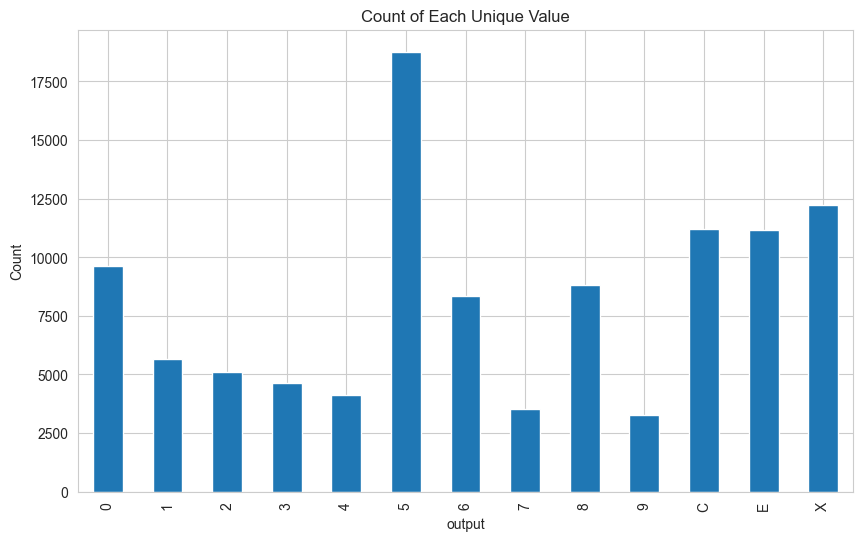

In [88]:
# Group by 'output' and count occurrences
output_counts = updated_data.groupby('output').size()

# Plot the count of each unique value
plt.figure(figsize=(10, 6))
output_counts.sort_index().plot(kind='bar')
plt.xlabel('output')
plt.ylabel('Count')
plt.title('Count of Each Unique Value')
plt.show()

### Now let us do the same for 0,1,2,3,4,6,7,8,9

In [93]:
# Create lists for samples with specific output values
samples = {}
for i in range(0, 10):
    samples[i] = data[data['output'] == str(i)]['Sample'].tolist()
print(samples)

{0: ['sample_00007', 'sample_00018', 'sample_00029', 'sample_00040', 'sample_00042', 'sample_00051', 'sample_00054', 'sample_00062', 'sample_00073', 'sample_00084', 'sample_00096', 'sample_00117', 'sample_00128', 'sample_00131', 'sample_00139', 'sample_00150', 'sample_00161', 'sample_00172', 'sample_00183', 'sample_00194', 'sample_00206', 'sample_00216', 'sample_00219', 'sample_00227', 'sample_00238', 'sample_00240', 'sample_00249', 'sample_00260', 'sample_00271', 'sample_00282', 'sample_00293', 'sample_00305', 'sample_00326', 'sample_00337', 'sample_00348', 'sample_00359', 'sample_00370', 'sample_00381', 'sample_00392', 'sample_00404', 'sample_00405', 'sample_00414', 'sample_00425', 'sample_00436', 'sample_00447', 'sample_00458', 'sample_00469', 'sample_00480', 'sample_00492', 'sample_00502', 'sample_00513', 'sample_00524', 'sample_00535', 'sample_00546', 'sample_00548', 'sample_00549', 'sample_00558', 'sample_00568', 'sample_00571', 'sample_00579', 'sample_00590', 'sample_00601', 'sa

In [98]:
#Count how many data we need to add 
num_0 = 10000 // len(samples[0]) 
num_1 = 10000 // len(samples[1]) 
num_2 = 10000 // len(samples[2]) 
num_3 = 10000 // len(samples[3]) 
num_4 = 10000 // len(samples[4]) 
num_6 = 10000 // len(samples[6]) 
num_7 = 10000 // len(samples[7]) 
num_8 = 10000 // len(samples[8]) 
num_9 = 10000 // len(samples[9]) 

In [103]:
new_sample_0 =process_images(samples[0], output_dirs['0'], '0', number_data = num_0)
new_sample_1 =process_images(samples[1], output_dirs['1'], '1', number_data = num_1)
new_sample_2 =process_images(samples[2], output_dirs['2'], '2', number_data = num_2)
new_sample_3 =process_images(samples[3], output_dirs['3'], '3', number_data = num_3)
new_sample_4 =process_images(samples[4], output_dirs['4'], '4', number_data = num_4)
new_sample_6 =process_images(samples[6], output_dirs['6'], '6', number_data = num_6)
new_sample_7 =process_images(samples[7], output_dirs['7'], '7', number_data = num_7)
new_sample_8 =process_images(samples[8], output_dirs['8'], '8', number_data = num_8)
new_sample_9 =process_images(samples[9], output_dirs['9'], '9', number_data = num_9)


In [104]:
df_0 = pd.DataFrame(new_sample_0)
df_1 = pd.DataFrame(new_sample_1)
df_2 = pd.DataFrame(new_sample_2)
df_3 = pd.DataFrame(new_sample_3)
df_4 = pd.DataFrame(new_sample_4)
df_6 = pd.DataFrame(new_sample_6)
df_7 = pd.DataFrame(new_sample_7)
df_8 = pd.DataFrame(new_sample_8)
df_9 = pd.DataFrame(new_sample_9)

In [105]:
updated_data = pd.concat([updated_data, df_0, df_1, df_2, df_3, df_4, df_6, df_7, df_8, df_9], ignore_index=True)

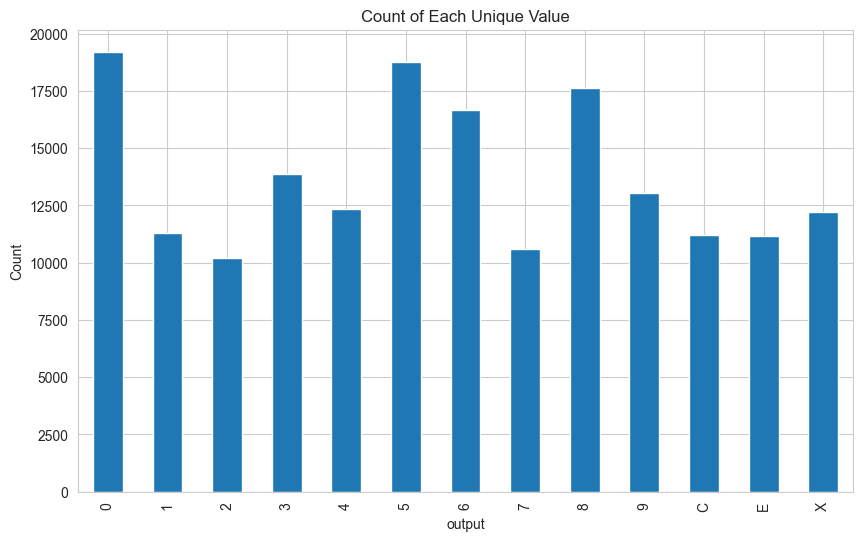

In [106]:
# Group by 'output' and count occurrences
output_counts = updated_data.groupby('output').size()

# Plot the count of each unique value
plt.figure(figsize=(10, 6))
output_counts.sort_index().plot(kind='bar')
plt.xlabel('output')
plt.ylabel('Count')
plt.title('Count of Each Unique Value')
plt.show()

# TRAINING NEURAL NETWORK PART


In [ ]:

# Define the directory containing the images
image_dir = 'new_Data' 

In [122]:
# put updated_data in a .txt


output_file_path = 'updated_Labels.txt'
updated_data.to_csv(output_file_path, index=False, header=False, sep='\t')

print(f"Data has been written to {output_file_path}")

Data has been written to updated_Labels.txt


In [ ]:
# Load and preprocess the images
def load_images_and_labels(data, image_dir):
    images = []
    labels = []
    failed = []
    for index, row in data.iterrows():
        image_path = os.path.join(image_dir, f"{row['Sample']}.png")  
        image_path_aug = os.path.join(image_dir, f"{row['Sample']}") 
        if os.path.exists(image_path):
            image = Image.open(image_path).convert('L')  # Convert to grayscale
            image = image.resize((28, 28))  # Resize to 28x28
            images.append(image)
            labels.append(row['output'])
        elif os.path.exists(image_path_aug):
            image = Image.open(image_path_aug).convert('L')  # Convert to grayscale
            image = image.resize((28, 28))  # Resize to 28x28
            images.append(image)
            labels.append(row['output'])
        else:
            print(f"Fail : Image not found: {image_path}")
            failed.append(row["Sample"])
    
    print(f"list of failed ones :{failed}")
    print(f"There are {len(failed)} failed images")
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_and_labels(updated_data, image_dir)


KeyboardInterrupt: 

Visualise one matrix:

In [119]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!
matprint(images[0])

0.364706  0.360784  0.321569  0.262745  0.243137  0.266667  0.270588  0.262745  0.290196  0.333333  0.345098  0.309804  0.298039  0.317647   0.32549  0.305882  0.309804   0.32549  0.356863  0.388235  0.380392  0.364706  0.376471  0.368627  0.364706  0.368627  0.380392  0.356863  
0.380392  0.380392  0.376471  0.309804  0.247059  0.243137  0.329412  0.333333  0.309804  0.396078  0.368627  0.305882  0.258824  0.231373  0.290196  0.298039  0.317647   0.34902  0.447059  0.462745  0.376471  0.384314  0.396078  0.364706   0.34902  0.352941  0.380392  0.380392  
0.411765  0.403922  0.396078  0.388235  0.329412  0.247059  0.407843  0.384314  0.266667  0.423529  0.364706  0.290196  0.223529  0.192157  0.254902  0.286275  0.282353  0.294118  0.301961  0.290196  0.270588  0.262745  0.282353  0.258824  0.231373  0.219608  0.235294  0.270588  
0.407843  0.407843  0.435294  0.427451  0.415686  0.329412  0.219608  0.215686  0.282353  0.490196  0.517647  0.513725  0.435294   0.32549  0.360784  0.38431

In [ ]:
# Convert labels to integers
label_mapping = {label: idx for idx, label in enumerate(np.unique(labels))}
labels = np.array([label_mapping[label] for label in labels])


### Splitting Train and Test
To split the data into train and test data, we will take into account the unbalanced data and do it manually (not use the train_test_split method).
Appart from '5' the rest of labels have approximately 10 000 samples each. If we want to devide the training set and test set 80%/20%, we will take 2 000 samples of each label samples for the test data:

In [ ]:
#train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.1667, random_state=42)

# Create a balanced test set with 2000 samples per class
test_size_per_class = 2000

test_images = []
test_labels = []
train_images = []
train_labels = []

for label in np.unique(labels):
    label_indices = np.where(labels == label)[0]
    np.random.shuffle(label_indices)
    test_indices = label_indices[:test_size_per_class]
    train_indices = label_indices[test_size_per_class:]
    
    test_images.extend(images[test_indices])
    test_labels.extend(labels[test_indices])
    train_images.extend(images[train_indices])
    train_labels.extend(labels[train_indices])

# Convert lists to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:


# Convert images and labels to PyTorch tensors
train_images = torch.tensor(train_images, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
test_images = torch.tensor(test_images, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Print the shapes of the datasets
print(f"train_images shape: {train_images.shape}")
print(f"train_labels shape: {train_labels.shape}")
print(f"test_images shape: {test_images.shape}")
print(f"test_labels shape: {test_labels.shape}")

In [ ]:

# Resize the image to 28x28 (as in MNIST)
img_resized = img.resize((28, 28))

# Convert the image to grayscale (if not already)
img_grayscale = img_resized.convert("L")

# Normalize pixel values to be in the range [0, 1]
img_array = np.array(img_grayscale) / 255.0

# Add batch dimension (needed for model input)
img_array_expanded = np.expand_dims(img_array, axis=0)

# Mock labels for demonstration (adjust as needed)
nb_classes = 12  # Example number of unique classes
y_train_mock = [5]  # Assuming this image corresponds to class "5"

# Convert the label into a one-hot encoded format
def to_categorical_numpy(labels, num_classes):
    return np.eye(num_classes)[labels]

y_train_categorical = to_categorical_numpy(y_train_mock, nb_classes)

img_array_expanded.shape, y_train_categorical